<a href="https://colab.research.google.com/github/yangyang9768/Project-cfg/blob/main/Timeseries_Pivot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from matplotlib.pyplot import figure



In [1]:
from google.colab import files
uploaded = files.upload()


Saving clean_data.csv to clean_data.csv


In [52]:
df = pd.read_csv('clean_data.csv')
df.date = pd.to_datetime(df['date'])
df=df[df['date']>'2021-02-01']
df['month'] =df.date.dt.strftime('%b')
uk_data = df[(df['location'] == 'United Kingdom')]
sw_data = df[(df['location'] == 'Sweden')]
Au_data=df[(df['location'] == 'Australia')]



916

**Time series Visualisation. Visualizing time series***

---



In [26]:
# def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
#     plt.figure(figsize=(16,5), dpi=dpi)
#     plt.plot(x, y, color='tab:red')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()

# plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

NameError: ignored

<Figure size 1600x500 with 0 Axes>

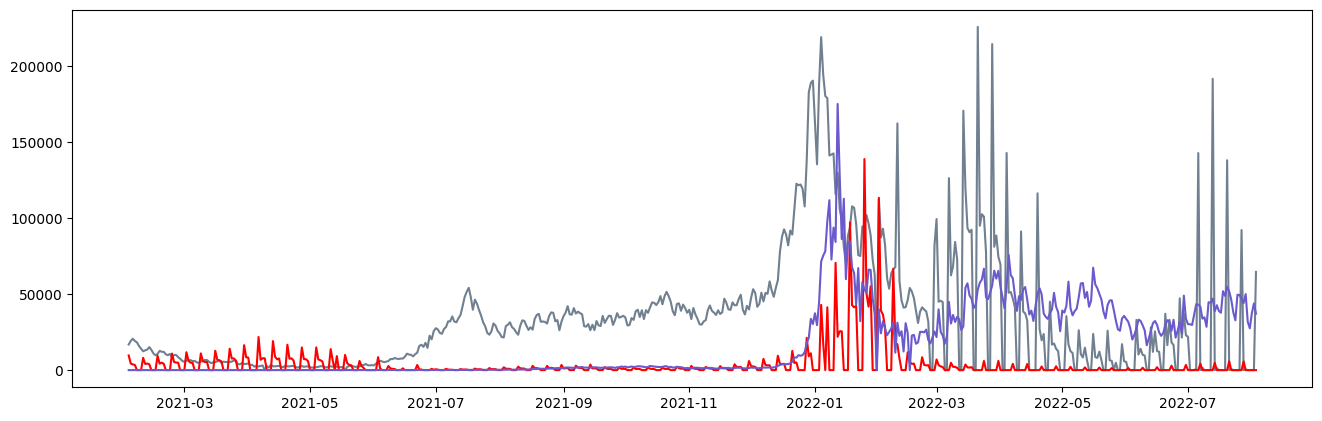

In [39]:
#Uk data
x=uk_data.date
y_uk= uk_data['new_cases']
y_sw= sw_data['new_cases']
y_au= Au_data['new_cases']
plt.figure(figsize=(16,5), dpi=100)
plt.gca().set(title='new_cases trend in Sweden UK Australia')
plt.plot(x, y_uk, color ='slategray')
plt.plot(x, y_sw, color = 'red')
plt.plot(x, y_au, color = 'slateblue')

plt.show()

# **Compared seasonality in different country**

In [68]:
def show_seasonality(data,country):
  fig, axes = plt.subplots(1,2,figsize=(20,7), dpi= 80)
  sns.boxplot(x=data.month, y=data['new_cases'], data=data,ax=axes[0])
  sns.boxplot(x=data.month, y=data['new_deaths'], data=data)
  axes[0].set_title(f'{country} new_case seasonality', fontsize=18); 
  axes[1].set_title(f'{country} new death_number seasonality', fontsize=18)

  plt.show()


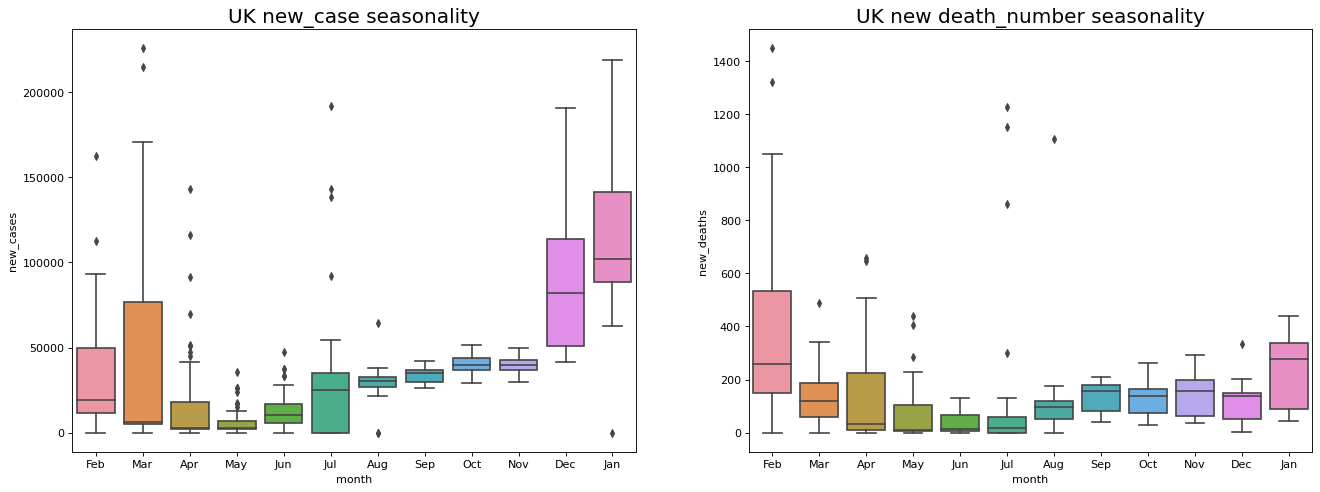

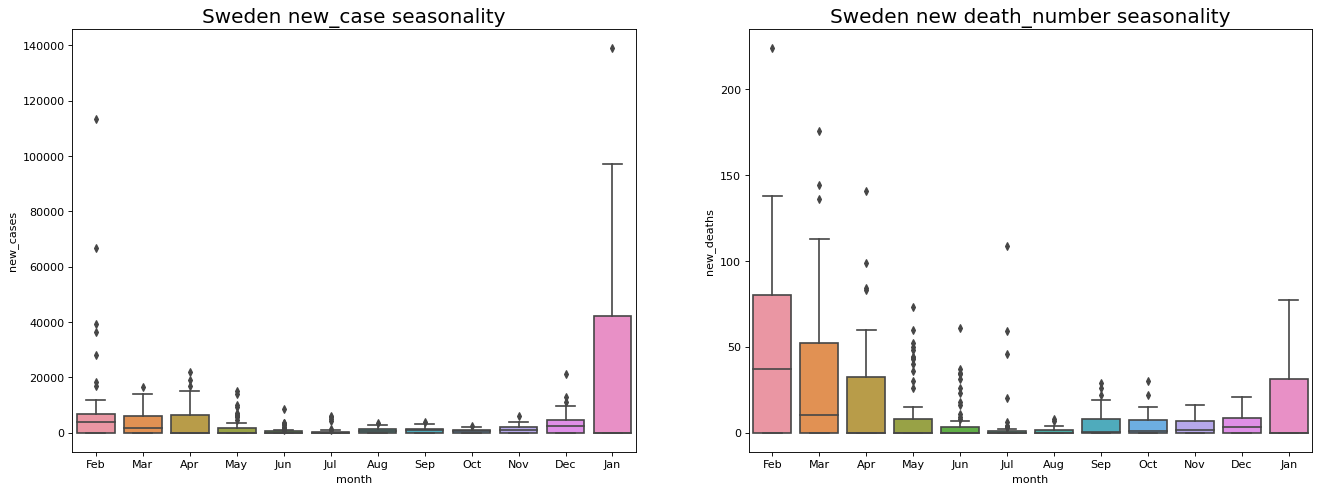

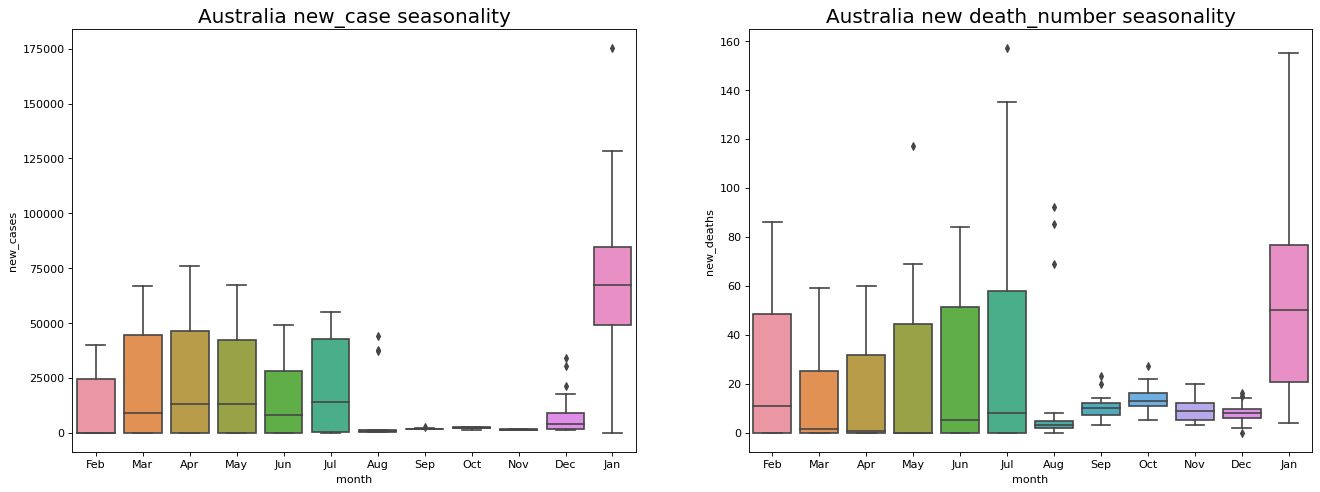

In [69]:


show_seasonality(uk_data,'UK')

show_seasonality(sw_data,'Sweden')

show_seasonality(Au_data,'Australia')

Moving Average Analysis

Uk situation analysis 

Moving average analysis please refer to: https://en.wikipedia.org/wiki/Moving-average_model


we would like to using moving average analysis to identify the  the growth situation of covid

As covid identification was influence by the window period and people filling testing

Based onthe COVID 19-SYMPTOM TIME LINES: the syptom normally coming in 5 days at 10 days and the window period normal 14 days.Therefore I would like to build the average moving of the new cases based above information

To identify fluctuations, we  build 5 days moving average/ 10days moving average/ 14 days moving averages 

In [13]:
# from IPython.core.display import display_svg
# def move_average_plot_test(data,country):
    
#     df=data[['date','total_cases','new_cases']].copy()
         
#     df.set_index('date', inplace=True)
#     df['5 days Moving_Average new cases'] = 0
#     df['5 days Moving_Average new cases'] = df['new_cases'].rolling(5).mean()
#     df['10 days Moving_Average new cases'] = 0
#     df['10 days Moving_Average new cases'] = df['new_cases'].rolling(10).mean()
#     df['14 days Moving_Average new cases'] = 0
#     df['14 days Moving_Average new cases'] = df['new_cases'].rolling(14).mean()
  
#     #Plot new cases, new deaths and people vaccinated 
#     df[['new_cases', '5 days Moving_Average new cases']].plot(figsize = (20, 5), alpha = 0.5)
#     plt.title(f'5 days moving average in {country}')

#     df[['new_cases', '10 days Moving_Average new cases']].plot(figsize = (20,5), alpha = 0.5)
#     plt.title(f' 10 days moving average in {country}')

#     df[['new_cases', '14 days Moving_Average new cases']].plot(figsize = (20, 5), alpha = 0.5)
#     plt.title(f' 14 days moving average in {country}')
#     #Return the dataframe processed
#     return df

In [ ]:
# move_average_plot_test(uk_data,'UnitedKingdom')

Based on above graph th 14days one is more smooth and more aligned with the grapgh

Therefore we select 14 days as our moving average period

In [15]:
def move_average_plot(data,country):
    
    df=data[['date','total_cases','new_cases',"new_deaths"]].copy()
         
    # df.set_index('date', inplace=True)
    df['14 days Moving_Average new cases'] = 0
    df['14 days Moving_Average new cases'] = df['new_cases'].rolling(14).mean()
    df['14 days Moving_Average new deaths'] = 0
    df['14 days Moving_Average new deaths'] = df['new_deaths'].rolling(14).mean()
  
    #Plot new cases, new deaths and people vaccinated 

    font1 = {'family':'serif','color':'blue','size':30}
    fig, ax = plt.subplots(figsize=(20, 5))
      # make a plot
    ax.plot(df.date,
              df['14 days Moving_Average new cases'],
              color="red", 
              marker="o")
      # set x-axis label
    ax.set_xlabel("date", fontsize = 12)
      # set y-axis label
    ax.set_ylabel("14 days Moving_Average new cases",
                    color="red",
                    fontsize=14)
    
    ax2=ax.twinx()
# make a plot with different y-axis using second axis object
   
    ax2.plot(df.date, df["14 days Moving_Average new deaths"],color="blue",marker="o")
    ax2.set_ylabel("14 days Moving_Average new deaths",color="blue",fontsize=12)
    plt.title(f' 14 days moving average new deaths VS 14 days moving average new cases in {country}')
    plt.show()






    # df[['14 days Moving_Average new deaths', '14 days Moving_Average new cases']].plot(figsize = (20, 5), alpha = 0.5)
    # plt.title(f'14 days moving average of new cases an deaths in {country}',fontdict = font1)
    #Return the dataframe processed
    return df

The data to caculated: Feb 2020 to Aug 2021  We have 30 month in total

Each graph have three peaks. Therefore We assume the out break cycle is 10 month

"Median (interquartile range) of time from symptom onset to death is currently shorter in the second wave (7
days [IQR 11 days]) compared to the first wave (13 days [IQR 14 days])."

Normal the window first dignosis to thedevelopment of syptom takes about 7 days off set the the new death clumn to 20days


Reference https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/928729/S0803_CO-CIN_-_Time_from_symptom_onset_until_death.pdf




In [16]:

def death_new_newcase_cor (dataset,Country):
    # 2020Feb to 2020 Nov
     stageOne= (dataset['date'] > "2020-02-01") & (dataset['date'] <= "2020-11-30")
     stageOnedf=dataset[stageOne]
     correlationstage1= stageOnedf['14 days Moving_Average new cases'].corr(stageOnedf["14 days Moving_Average new deaths"].shift(-20))
    #2020 Dec to 2021  Sep
     stageTwo= (dataset['date'] > "2020-12-01") & (dataset['date'] <= "2021-09-30")
     stageTwodf=dataset[stageTwo]
     correlationstage2= stageTwodf['14 days Moving_Average new cases'].corr(stageTwodf["14 days Moving_Average new deaths"].shift(-20))
    # 2021 Sep to 2022 Aug
     stageThree= (dataset['date'] > "2021-09-30") & (dataset['date'] <= "2022-08-01")
     stageThreedf=dataset[stageThree]
     correlationstage3= stageThreedf['14 days Moving_Average new cases'].corr(stageThreedf["14 days Moving_Average new deaths"].shift(-20))
       
     print(f'{Country}\n stage 1: the correlation between new cases and death is{correlationstage1}\n stage 2: the correlation between new cases and death is{correlationstage3}\n stage 3: the correlation between new cases and death is{correlationstage3}')
    


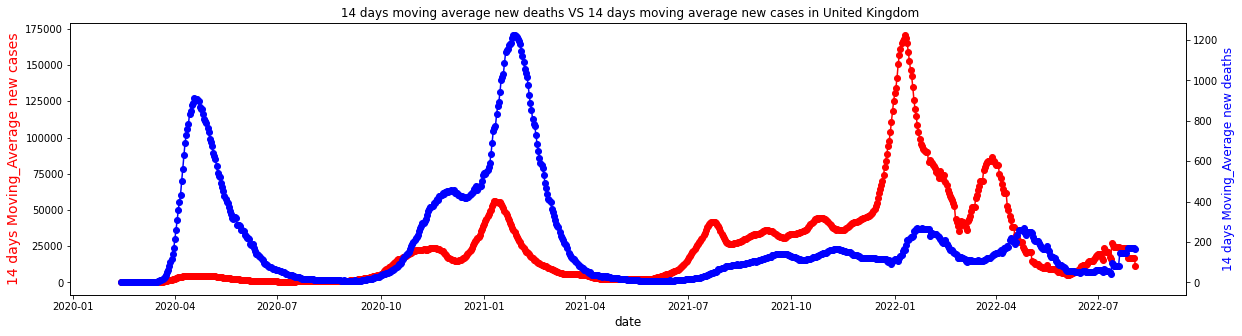

United Kingdom
 stage 1: the correlation between new cases and death is0.3351076415311907
 stage 2: the correlation between new cases and death is0.7820510237261065
 stage 3: the correlation between new cases and death is0.7820510237261065


In [17]:
uk_data_moveAverage= move_average_plot(uk_data,'United Kingdom')


death_new_newcase_cor(uk_data_moveAverage,"United Kingdom")


the same analysi conducted on the sweden and Australia

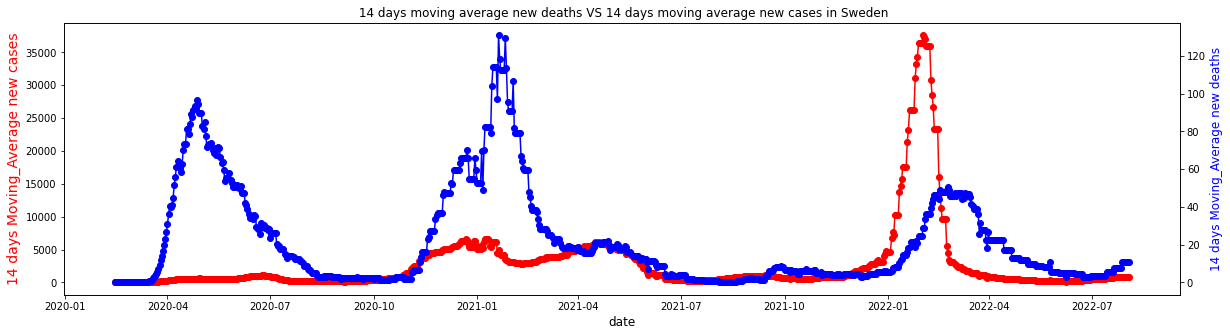

Sweden
 stage 1: the correlation between new cases and death is0.1472533943806396
 stage 2: the correlation between new cases and death is0.8211260082005782
 stage 3: the correlation between new cases and death is0.8211260082005782


In [18]:

sw_datamoveAverage=move_average_plot(sw_data,'Sweden')

death_new_newcase_cor(sw_datamoveAverage,"Sweden")

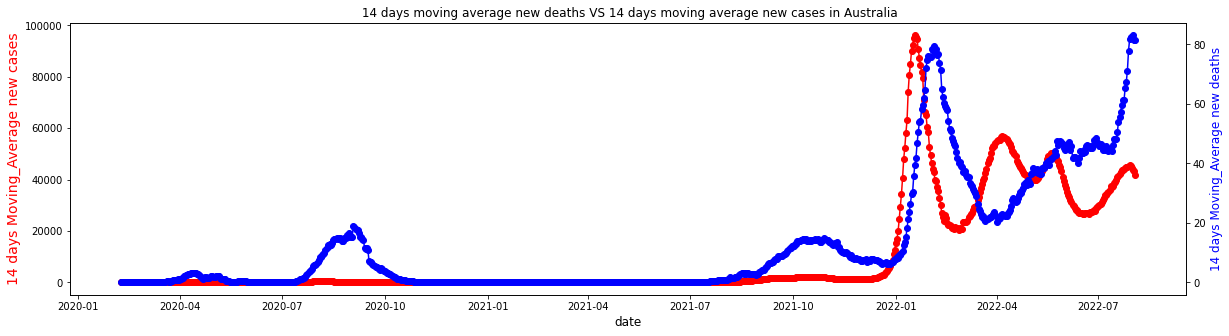

Australia
 stage 1: the correlation between new cases and death is0.8889131588811727
 stage 2: the correlation between new cases and death is0.769755350318127
 stage 3: the correlation between new cases and death is0.769755350318127


In [19]:

Au_datamoveAverage=move_average_plot(Au_data,'Australia')
death_new_newcase_cor(Au_datamoveAverage,"Australia")